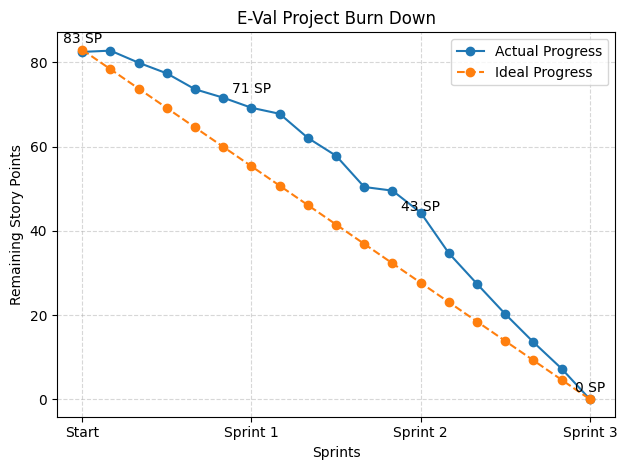

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Original sprint checkpoints
sprint_positions = np.array([0, 1, 2, 3])
sprint_labels = ['Start', 'Sprint 1', 'Sprint 2', 'Sprint 3']
actual_sp = np.array([83, 71, 43, 0])

# Create 15 intermediate points between Start and Sprint 3
total_points = len(sprint_positions) + 15
x = np.linspace(0, 3, total_points)

# Ideal linear burn-down for each intermediate point
ideal = actual_sp[0] * (1 - x / 3)

# Piecewise linear interpolation for actual, plus small random variation
np.random.seed(42)
interp_actual = np.interp(x, sprint_positions, actual_sp)
jitter = np.random.uniform(-2, 2, size=x.shape)
actual = np.clip(interp_actual + jitter, 0, actual_sp[0])

# Plot
plt.figure()
plt.plot(x, actual, marker='o', label='Actual Progress')
plt.plot(x, ideal, linestyle='--', marker='o', label='Ideal Progress')

# Annotate original sprint points
for xi, yi in zip(sprint_positions, actual_sp):
    plt.annotate(f'{yi} SP', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

# Labels, title, grid, legend
plt.xticks(sprint_positions, sprint_labels)
plt.xlabel('Sprints')
plt.ylabel('Remaining Story Points')
plt.title('E-Val Project Burn Down')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
